### Visualização de dados com visão técnica

In [1]:
!pip install faker --quiet

# Importação de bibliotecas
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from faker import Faker
from datetime import datetime, timedelta

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 11.2 MB/s eta 0:00:00


In [2]:
# Configurações de estilo
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# -----------------------------------------------
# 1. Geração de dados simulados de sensores
# -----------------------------------------------

# Instanciando o gerador de dados falsos
fake = Faker()

# Definindo número de amostras
n_amostras = 1000

# Função para simular leituras de sensores
def gerar_dados_sensores(n):
    dados = []
    inicio = datetime.now()

    for i in range(n):
        timestamp = inicio + timedelta(seconds=i * 60)
        temperatura = round(random.normalvariate(70, 5), 2)
        pressao = round(random.normalvariate(1.5, 0.1), 2)
        vibracao = round(random.normalvariate(0.05, 0.01), 4)
        operador = fake.first_name()

        dados.append([timestamp, temperatura, pressao, vibracao, operador])

    return pd.DataFrame(dados, columns=["timestamp", "temperatura_C", "pressao_bar", "vibracao_mm/s", "operador"])

# Criando o DataFrame
df = gerar_dados_sensores(n_amostras)

# Visualizando as 5 primeiras linhas
df.head()

,timestamp,temperatura_C,pressao_bar,vibracao_mm/s,operador
0,2025-05-08 12:57:06.805463,72.38,1.47,0.0466,Julia
1,2025-05-08 12:58:06.805463,74.12,1.40,0.0340,Donna
2,2025-05-08 12:59:06.805463,65.34,1.58,0.0616,Peter
3,2025-05-08 13:00:06.805463,64.48,1.59,0.0574,Derek
4,2025-05-08 13:01:06.805463,75.57,1.54,0.0734,Ryan


In [3]:
# -----------------------------------------------
# 2. Análise Estatística Inicial
# -----------------------------------------------

# Sumário estatístico das variáveis numéricas
df.describe()


,timestamp,temperatura_C,pressao_bar,vibracao_mm/s
count,1000,1000.000000,1000.000000,1000.000000
mean,2025-05-08 21:16:36.805463040,69.677400,1.502150,0.049744
min,2025-05-08 12:57:06.805463,51.940000,1.190000,0.023200
25%,2025-05-08 17:06:51.805463040,66.630000,1.430000,0.043175
50%,2025-05-08 21:16:36.805463040,69.500000,1.505000,0.049450
75%,2025-05-09 01:26:21.805463040,72.682500,1.570000,0.056025
max,2025-05-09 05:36:06.805463,83.790000,1.860000,0.083200
std,NaN,4.873089,0.103258,0.009796


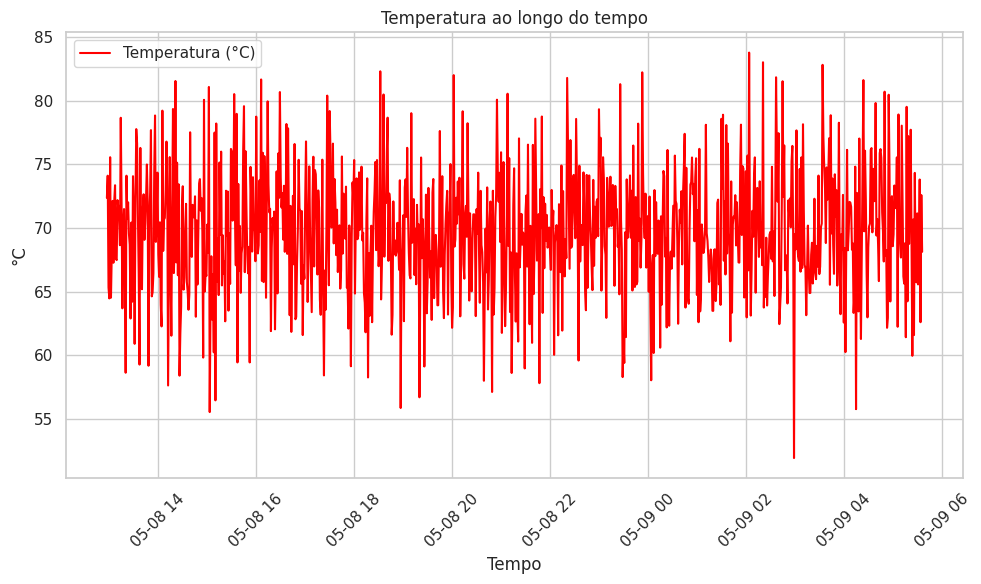

In [4]:
# -----------------------------------------------
# 3. Evolução temporal das variáveis
# -----------------------------------------------

# Gráfico de temperatura ao longo do tempo
plt.plot(df["timestamp"], df["temperatura_C"], label="Temperatura (°C)", color="red")
plt.title("Temperatura ao longo do tempo")
plt.xlabel("Tempo")
plt.ylabel("°C")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


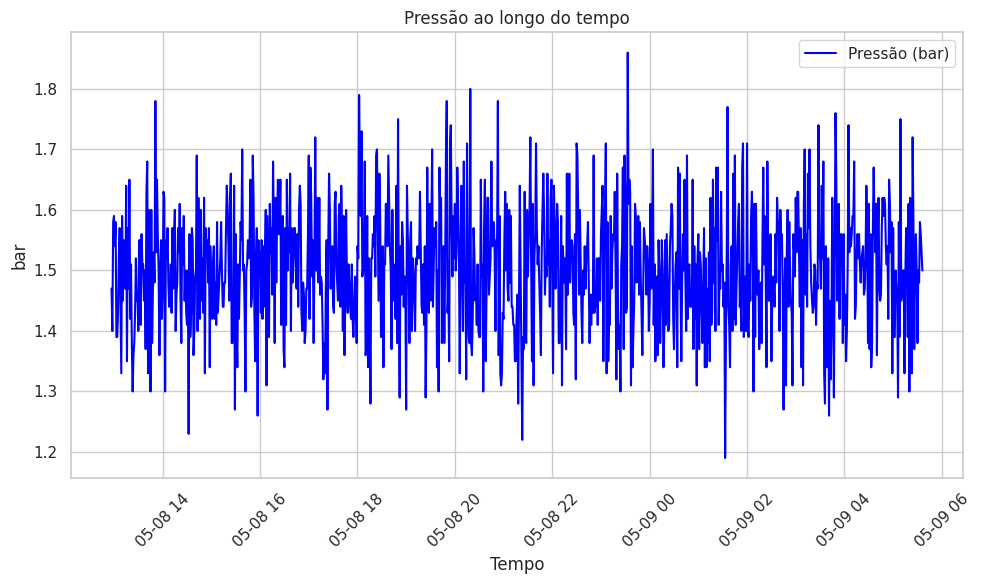

In [5]:
# Gráfico de pressão ao longo do tempo
plt.plot(df["timestamp"], df["pressao_bar"], label="Pressão (bar)", color="blue")
plt.title("Pressão ao longo do tempo")
plt.xlabel("Tempo")
plt.ylabel("bar")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


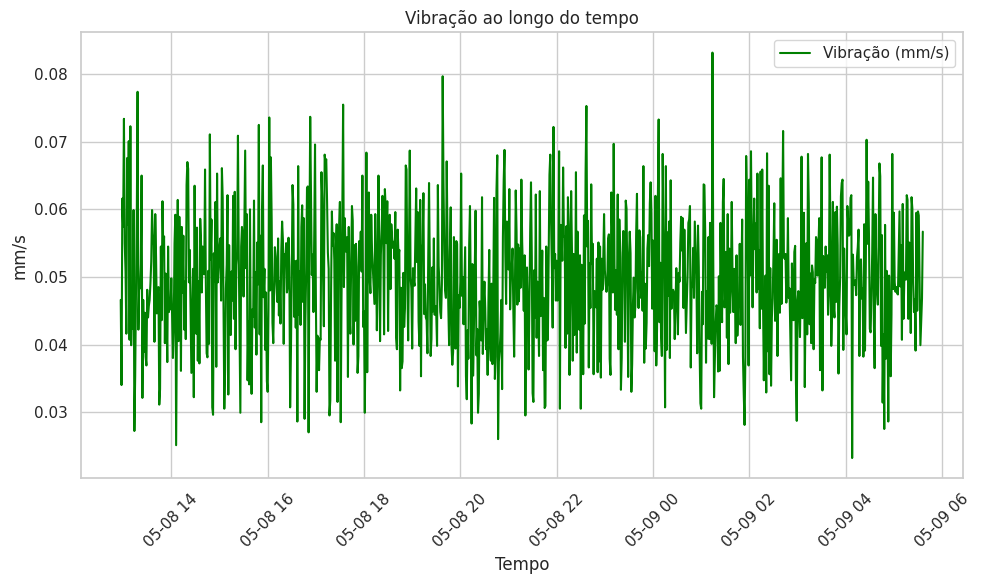

In [6]:
# Gráfico de vibração ao longo do tempo
plt.plot(df["timestamp"], df["vibracao_mm/s"], label="Vibração (mm/s)", color="green")
plt.title("Vibração ao longo do tempo")
plt.xlabel("Tempo")
plt.ylabel("mm/s")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


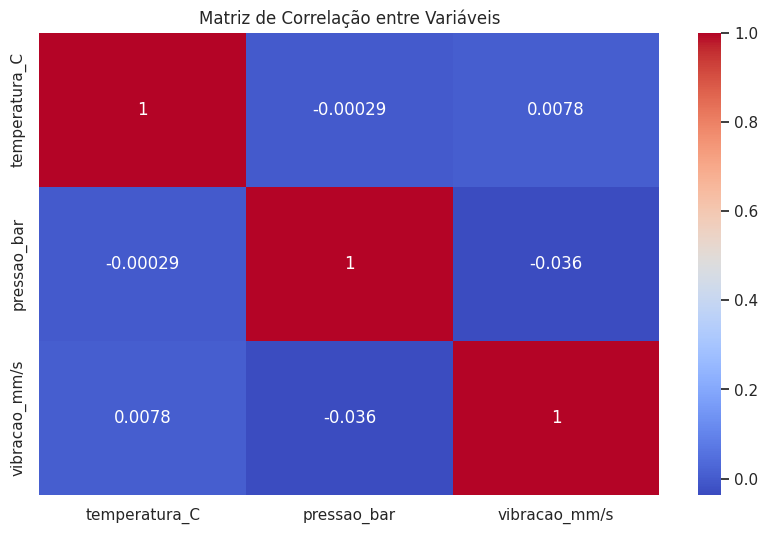

In [7]:
# -----------------------------------------------
# 4. Correlação entre variáveis
# -----------------------------------------------

# Selecionando apenas colunas numéricas
df_numerico = df.select_dtypes(include=["float64"])

# Matriz de correlação
correlacao = df_numerico.corr()

# Heatmap
sns.heatmap(correlacao, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlação entre Variáveis")
plt.show()


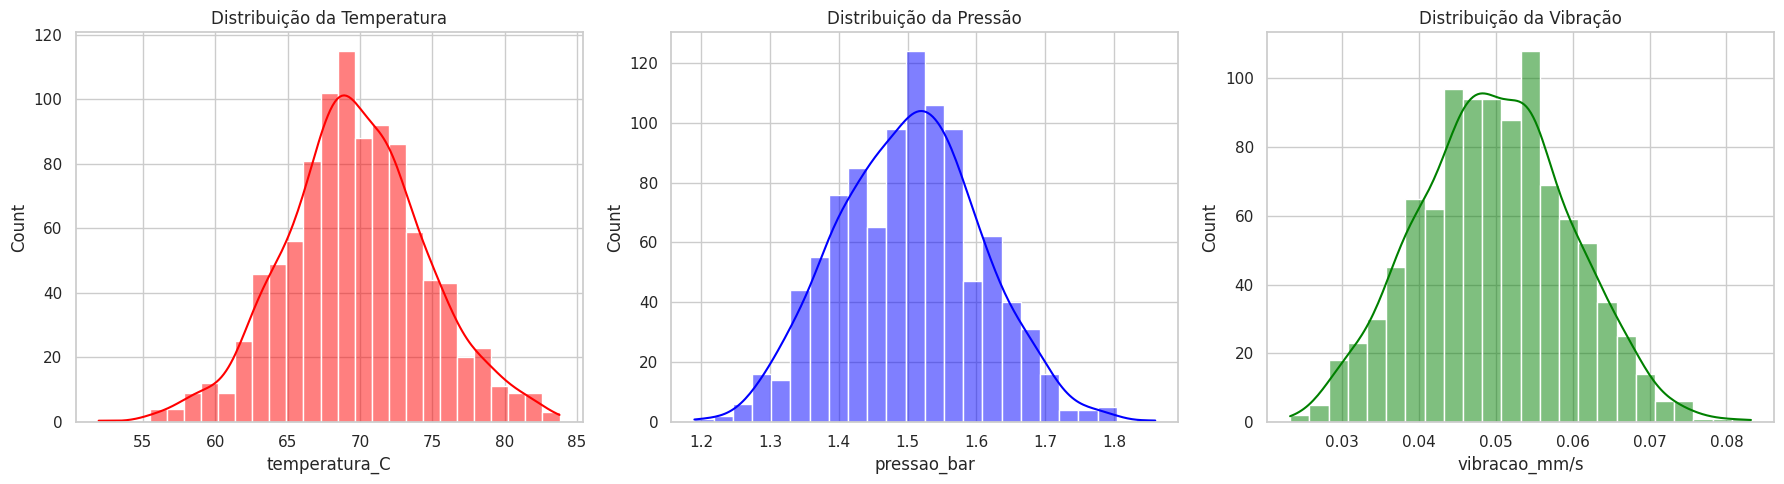

In [8]:
# -----------------------------------------------
# 5. Distribuição das variáveis
# -----------------------------------------------

# Histograma das distribuições
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df["temperatura_C"], kde=True, ax=axes[0], color="red")
axes[0].set_title("Distribuição da Temperatura")

sns.histplot(df["pressao_bar"], kde=True, ax=axes[1], color="blue")
axes[1].set_title("Distribuição da Pressão")

sns.histplot(df["vibracao_mm/s"], kde=True, ax=axes[2], color="green")
axes[2].set_title("Distribuição da Vibração")

plt.tight_layout()
plt.show()


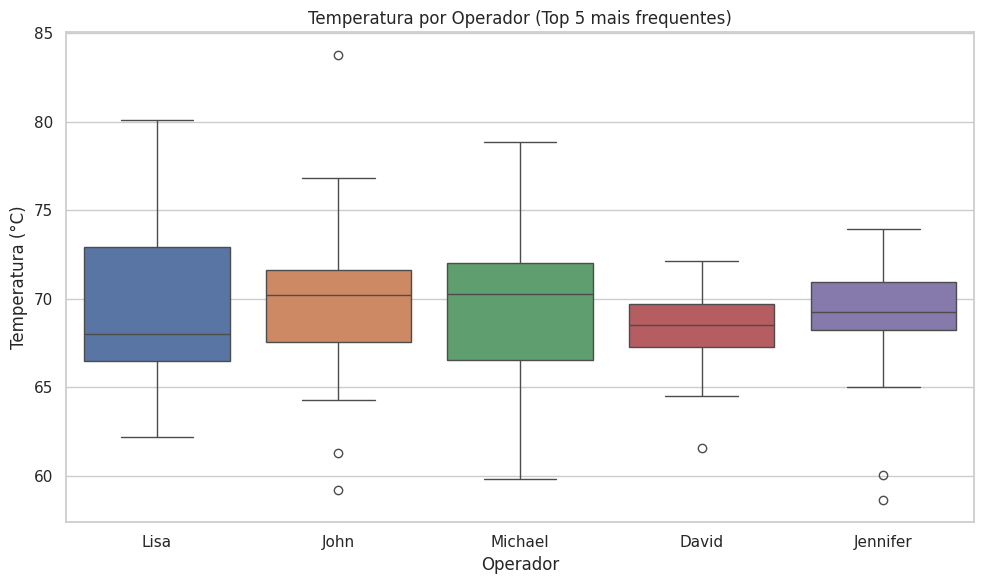

In [11]:
# -----------------------------------------------
# 6. Análise por operador (responsável técnico) - Versão Final sem warnings
# -----------------------------------------------

# Selecionar os 5 operadores com mais registros
top_operadores = df["operador"].value_counts().nlargest(5).index
df_top = df[df["operador"].isin(top_operadores)]

# Boxplot da temperatura apenas para os 5 operadores mais frequentes
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_top, x="operador", y="temperatura_C", hue="operador", legend=False)
plt.title("Temperatura por Operador (Top 5 mais frequentes)")
plt.xlabel("Operador")
plt.ylabel("Temperatura (°C)")
plt.tight_layout()
plt.show()
